In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os


In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.7.1 louvain==0.7.0 leidenalg==0.8.3


In [3]:
datadir = "/Users/rejsmont/Google Drive/My Drive/Projects/RDN-WDP/sharing/"
clusters = pd.read_csv(os.path.join(datadir, 'export', 'clusters.csv'), index_col=0)
cluster_rename = dict(zip(clusters.index.astype(str), clusters['0']))
cluster_rename

{'1': 'R8 ato(+)',
 '2': 'MF ato(+++)',
 '3': 'peripodial',
 '4': 'posterior',
 '5': 'anterior',
 '6': 'MF ato(+)',
 '7': 'non-R8'}

In [4]:
sct_counts = pd.read_csv(os.path.join('r', 'seurat_count.csv')).T
sct_counts

,128up,14-3-3epsilon,14-3-3zeta,140up,18SrRNA-Psi:CR41602,18w,26-29-p,28SrRNA-Psi:CR40596,28SrRNA-Psi:CR40741,28SrRNA-Psi:CR41609,...,z,zetaCOP,zf30C,zfh1,zfh2,zip,zld,zormin,zuc,zyd
0,1,41,29,0,0,0,1,0,0,0,...,0,3,2,0,0,2,1,0,0,0
1,1,24,19,0,0,0,1,2,0,0,...,0,3,0,2,0,8,1,0,0,0
2,0,85,45,2,0,0,2,2,0,0,...,2,1,0,0,0,11,3,0,0,0
3,0,59,43,0,0,0,2,2,0,0,...,0,3,0,0,2,14,1,0,0,0
4,4,25,18,0,0,5,1,0,0,0,...,0,3,0,0,0,6,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,1,43,34,0,0,1,3,0,0,0,...,1,6,0,0,1,5,7,0,0,0
2378,1,33,17,1,0,0,15,0,0,0,...,0,1,1,6,0,17,0,0,0,0
2379,0,57,31,0,0,1,6,0,0,0,...,1,5,0,1,4,1,1,0,0,7
2380,1,24,22,0,0,1,6,0,0,0,...,0,3,1,0,0,30,2,1,0,0


In [5]:
sct_norm = pd.read_csv(os.path.join('r', 'seurat_norm.csv')).T
sct_norm

,128up,14-3-3epsilon,14-3-3zeta,140up,18SrRNA-Psi:CR41602,18w,26-29-p,28SrRNA-Psi:CR40596,28SrRNA-Psi:CR40741,28SrRNA-Psi:CR41609,...,z,zetaCOP,zf30C,zfh1,zfh2,zip,zld,zormin,zuc,zyd
0,0.693147,3.737670,3.401197,0.000000,0.0,0.000000,0.693147,0.000000,0.0,0.0,...,0.000000,1.386294,1.098612,0.000000,0.000000,1.098612,0.693147,0.000000,0.0,0.000000
1,0.693147,3.218876,2.995732,0.000000,0.0,0.000000,0.693147,1.098612,0.0,0.0,...,0.000000,1.386294,0.000000,1.098612,0.000000,2.197225,0.693147,0.000000,0.0,0.000000
2,0.000000,4.454347,3.828641,1.098612,0.0,0.000000,1.098612,1.098612,0.0,0.0,...,1.098612,0.693147,0.000000,0.000000,0.000000,2.484907,1.386294,0.000000,0.0,0.000000
3,0.000000,4.094345,3.784190,0.000000,0.0,0.000000,1.098612,1.098612,0.0,0.0,...,0.000000,1.386294,0.000000,0.000000,1.098612,2.708050,0.693147,0.000000,0.0,0.000000
4,1.609438,3.258097,2.944439,0.000000,0.0,1.791759,0.693147,0.000000,0.0,0.0,...,0.000000,1.386294,0.000000,0.000000,0.000000,1.945910,0.693147,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.693147,3.784190,3.555348,0.000000,0.0,0.693147,1.386294,0.000000,0.0,0.0,...,0.693147,1.945910,0.000000,0.000000,0.693147,1.791759,2.079442,0.000000,0.0,0.000000
2378,0.693147,3.526361,2.890372,0.693147,0.0,0.000000,2.772589,0.000000,0.0,0.0,...,0.000000,0.693147,0.693147,1.945910,0.000000,2.890372,0.000000,0.000000,0.0,0.000000
2379,0.000000,4.060443,3.465736,0.000000,0.0,0.693147,1.945910,0.000000,0.0,0.0,...,0.693147,1.791759,0.000000,0.693147,1.609438,0.693147,0.693147,0.000000,0.0,2.079442
2380,0.693147,3.218876,3.135494,0.000000,0.0,0.693147,1.945910,0.000000,0.0,0.0,...,0.000000,1.386294,0.693147,0.000000,0.000000,3.433987,1.098612,0.693147,0.0,0.000000


In [6]:
sct_scaled = pd.read_csv(os.path.join('r', 'seurat_scale.csv')).T
sct_scaled

,128up,14-3-3epsilon,14-3-3zeta,140up,18SrRNA-Psi:CR41602,18w,26-29-p,28SrRNA-Psi:CR40596,28SrRNA-Psi:CR40741,28SrRNA-Psi:CR41609,...,z,zetaCOP,zf30C,zfh1,zfh2,zip,zld,zormin,zuc,zyd
0,-0.697236,-0.434735,-0.103411,-0.387376,-0.156825,-0.357135,-0.776454,-0.206720,-0.105862,-0.002574,...,-0.405665,0.093734,1.240374,-0.298772,-0.356596,-1.090128,-0.833277,-0.244171,-0.186462,-0.079242
1,-0.734268,-1.178368,-0.890820,-0.410936,-0.162680,-0.370877,-0.811083,4.799748,-0.109150,-0.005630,...,-0.428546,-0.033490,-0.613440,0.728679,-0.369480,0.211952,-0.864732,-0.255655,-0.195239,-0.082025
2,-0.796131,1.579108,1.225564,2.029505,-0.172132,-0.394103,-0.141875,4.371774,-0.114454,-0.010827,...,1.621836,-1.208347,-0.667140,-0.317054,-0.391266,0.801303,-0.407664,-0.275097,-0.209673,-0.086529
3,-0.798036,0.394044,1.042458,-0.452039,-0.172417,-0.394824,-0.145901,4.359399,-0.114614,-0.010989,...,-0.468440,-0.237280,-0.668800,-0.317412,0.737673,1.589248,-0.917942,-0.275701,-0.210113,-0.086665
4,1.975690,-1.148265,-0.990144,-0.427624,-0.166704,3.166172,-0.835246,-0.221361,-0.111409,-0.007802,...,-0.444747,-0.118829,-0.635978,-0.310370,-0.378603,-0.306080,-0.886595,-0.263792,-0.201345,-0.083940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.001470,-0.316238,0.286065,-0.573680,-0.198144,0.405704,0.051504,-0.270575,-0.129057,-0.027109,...,1.039228,1.439156,-0.829393,-0.352588,0.422611,-0.507941,0.820504,-0.335171,-0.251073,-0.099024
2378,-0.459343,-0.760093,-1.026773,0.765065,-0.224676,-0.551542,5.084654,-0.315237,-0.144046,-0.047675,...,-0.730576,-1.207917,-0.116874,3.040393,-0.539348,2.100458,-1.214187,-0.408806,-0.295809,-0.112008
2379,-0.929964,0.291506,0.117164,-0.539591,-0.191358,0.485134,1.355191,-0.259611,-0.125243,-0.022546,...,1.182711,0.960388,-0.784918,0.446618,2.382996,-1.330645,-1.024002,-0.318476,-0.240035,10.556351
2380,-0.329197,-1.158364,-0.596673,-0.371265,-0.279846,0.233336,1.319203,1.023284,-0.176101,-0.113896,...,-1.133349,-0.260655,-0.190492,-0.522061,-0.764838,5.035982,-0.598203,0.937669,-0.395823,-0.140367


In [7]:
sct_genes = sct_counts.columns.to_frame().rename(columns={0: 'gene_ids'})
sct_genes

,gene_ids
128up,128up
14-3-3epsilon,14-3-3epsilon
14-3-3zeta,14-3-3zeta
140up,140up
18SrRNA-Psi:CR41602,18SrRNA-Psi:CR41602
...,...
zip,zip
zld,zld
zormin,zormin
zuc,zuc


In [8]:
sct_metadata = pd.read_csv(os.path.join('r', 'seurat_metadata.csv')) \
                 .drop(columns=['seurat_clusters'])
sct_metadata.index = sct_metadata.index.astype(str)
sct_metadata['barcodes'] = sct_metadata['barcodes'].str.rstrip(to_strip='-1234567890')
sct_metadata['rep'] = sct_metadata['rep'].astype('category').values
sct_metadata['image_clusters'] = sct_metadata['image_clusters'].astype('str').astype('category').values
for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    sct_metadata['SCT_snn_res.' + str(i)] = sct_metadata['SCT_snn_res.' + str(i)].astype('str') \
                                                                                 .astype('category').values
sct_metadata

,orig.ident,nCount_RNA,nFeature_RNA,barcodes,rep,image_clusters,nCount_SCT,nFeature_SCT,SCT_snn_res.0,SCT_snn_res.0.1,SCT_snn_res.0.2,SCT_snn_res.0.3,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.0.9,SCT_snn_res.1
0,Eye Disc,5908,1793,AACCGCGGTTGAGTTC,1,6,17479,2419,0,1,3,4,3,3,3,3,3,1,1
1,Eye Disc,6605,1739,AACGTTGCAATCACAC,1,7,17676,2322,0,2,6,6,11,11,11,12,12,14,14
2,Eye Disc,7888,2243,AACTCCCGTTCTGGTA,1,4,17097,2570,0,1,2,2,2,2,2,2,2,10,10
3,Eye Disc,7930,2283,AACTCCCTCCCAAGTA,1,4,17373,2629,0,1,2,2,2,2,2,2,2,10,10
4,Eye Disc,7126,1333,AACTCCCTCTGCGTAA,1,3,18352,1943,0,0,0,3,8,8,8,9,9,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,Eye Disc,12731,2618,TTTGGTTCAAGAAAGG,2,4,18104,2636,0,0,0,0,0,0,0,6,6,4,3
2378,Eye Disc,20737,2839,TTTGGTTTCTATCCTA,2,4,19179,2837,0,3,4,5,4,4,4,4,4,2,2
2379,Eye Disc,11245,2530,TTTGTCACAGCGATCC,2,6,17860,2578,0,4,7,8,10,10,10,11,11,13,13
2380,Eye Disc,63216,5034,TTTGTCAGTACCGGCT,2,4,20877,3359,0,0,0,0,0,0,0,6,6,4,3


In [9]:
adata = sc.AnnData(X = sct_counts.values, obs = sct_metadata, var=sct_genes)
adata.layers['norm'] = sct_norm.values
adata.layers['counts'] = sct_counts.values
adata.layers['scaled'] = sct_scaled.values
adata.obs['image_clusters'] = adata.obs['image_clusters'].map(cluster_rename).astype('category')
adata


AnnData object with n_obs × n_vars = 2382 × 10329
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcodes', 'rep', 'image_clusters', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1'
    var: 'gene_ids'
    layers: 'norm', 'counts', 'scaled'

normalizing counts per cell
    finished (0:00:00)


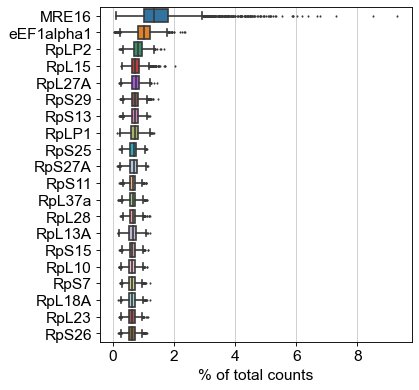

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [11]:
adata.var['mt'] = adata.var_names.str.startswith('mt:')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'orig.ident' as categorical
... storing 'barcodes' as categorical


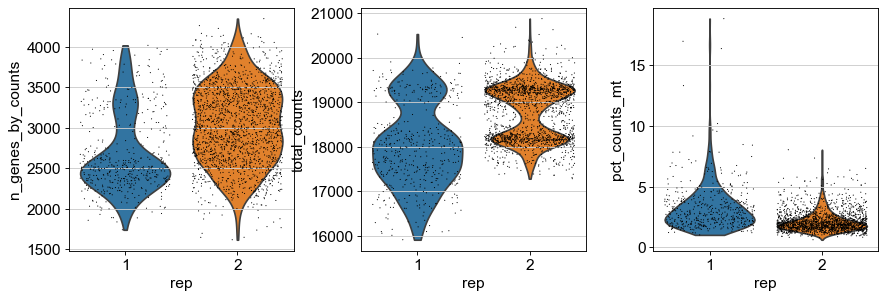

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 'rep', jitter=0.4, multi_panel=True)

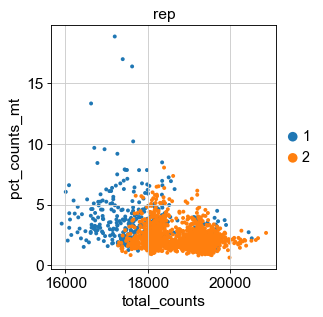

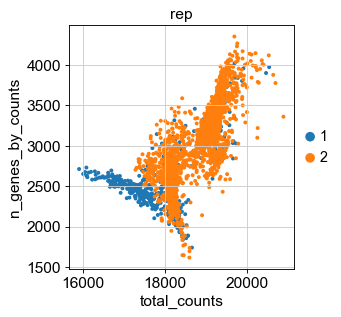

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='rep')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='rep')

In [14]:
seurat_hvg = pd.read_csv(os.path.join('r', 'seurat_var.csv')).index
adata.var['highly_variable'] = adata.var.index.isin(seurat_hvg)

In [15]:
seurat_pca = pd.read_csv(os.path.join('r', 'seurat_pca.csv'))
adata.obsm['X_pca'] = seurat_pca.values

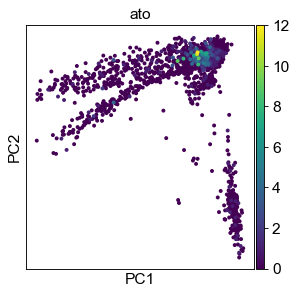

In [16]:
sc.pl.pca(adata, color='ato')

In [17]:
seurat_umap = pd.read_csv(os.path.join('r', 'seurat_umap.csv'))
adata.obsm['X_umap'] = seurat_umap.values

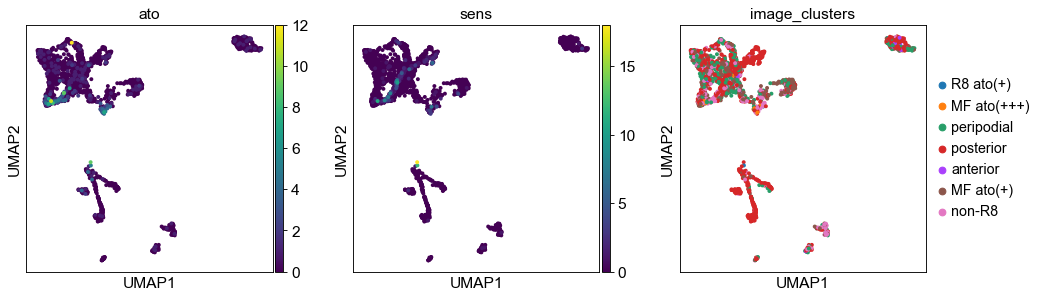

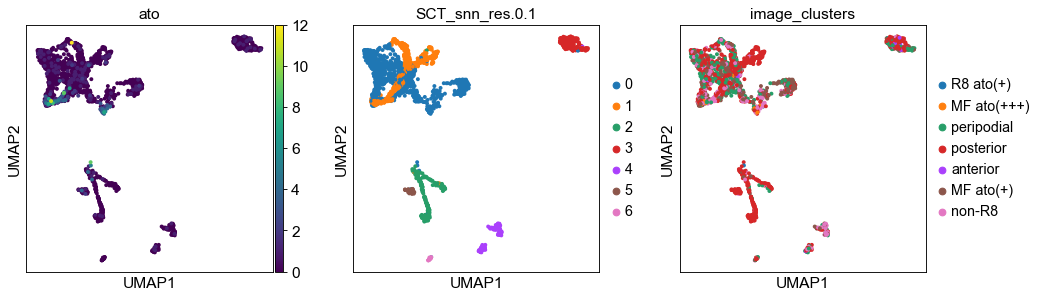

In [22]:
sc.pl.umap(adata, color=['ato', 'sens', 'image_clusters'])
sc.pl.umap(adata, color=[ 'ato', 'SCT_snn_res.0.1', 'image_clusters'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_SCT_snn_res.0.1']`
/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


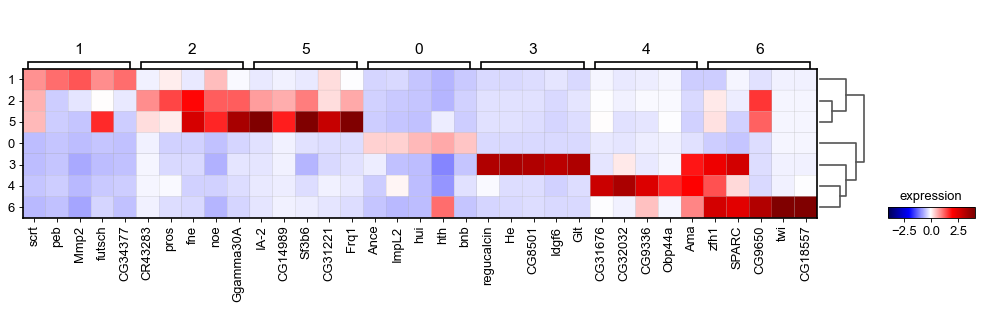

In [19]:
category = 'SCT_snn_res.0.1'
sc.tl.dendrogram(adata, category)
order = adata.uns['dendrogram_' + category]['dendrogram_info']['ivl']
diff_snn = pd.read_csv(os.path.join('r', 'seurat_diff_' + category + '.csv'))
diff_snn['cluster'] = diff_snn['cluster'].astype(str)
diff = diff_snn.sort_values('avg_log2FC', ascending=False).groupby('cluster') \
               .head(5).set_index(['cluster', 'avg_log2FC']).sort_index(ascending=False) \
               .loc[order, 'gene'].droplevel('avg_log2FC')
keys = dict(diff.groupby('cluster').apply(list))
mp = sc.pl.MatrixPlot(adata, keys, groupby=category, layer='scaled',
                      cmap='seismic', vmin=-4, vmax=4)
mp.add_dendrogram(dendrogram_key='dendrogram_' + category)
mp = mp.style(cmap='seismic').legend(title='expression')
mp.show()

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_image_clusters']`
/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


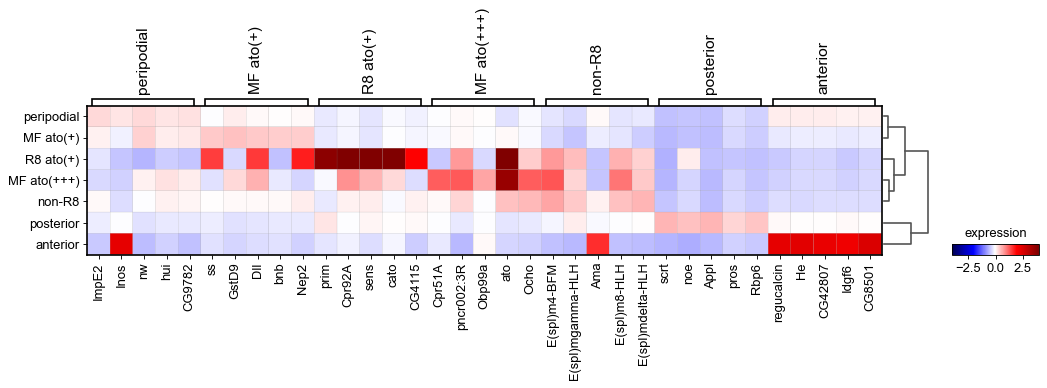

In [20]:
category = 'image_clusters'
sc.tl.dendrogram(adata, category)
order = adata.uns['dendrogram_' + category]['dendrogram_info']['ivl']
diff_snn = pd.read_csv(os.path.join('r', 'seurat_diff_' + category + '.csv'))
diff_snn['cluster'] = diff_snn['cluster'].astype(str).map(cluster_rename).astype('category')
diff = diff_snn.sort_values('avg_log2FC', ascending=False).groupby('cluster') \
               .head(5).set_index(['cluster', 'avg_log2FC']).sort_index(ascending=False) \
               .loc[order, 'gene'].droplevel('avg_log2FC')
keys = dict(diff.groupby('cluster').apply(list))
mp = sc.pl.MatrixPlot(adata, keys, groupby=category, layer='scaled',
                      cmap='seismic', vmin=-4, vmax=4)
mp.add_dendrogram(dendrogram_key='dendrogram_' + category)
mp = mp.style(cmap='seismic').legend(title='expression')
mp.show()